<a href="https://colab.research.google.com/github/AlexKalll/SSM-State-Space-Model/blob/main/Tast_1_Pendulum's_dynamic_system_using_SSM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## State Space Model - Pendulum from Scratch


### Task1:Implement a Discrete-Time SSM from Scratch
#### Objective: Build a NumPy-based SSM to model a simple physical system ( a pendulum).
**Sub-Tasks:**
- Pick a dynamic state to work with
- Determine the State Space Representation for the dynamic system.
- Implement it (you can use any library as long as it is written in python)


**1. Dynamic System: In this case `
The Pendulum`**

* **State Variables:**
    * `θ(t)`: The angle of the pendulum from the vertical at time *t* (in radians).
    * `ω(t)`: The angular velocity of the pendulum at time *t* (in radians per second).
* **Input:**
    * `τ(t)`: The torque applied to the pendulum at time *t* (we can also start by setting this to 0 for a free-swinging pendulum).
* **Output:**
    * We can choose our output to be the angle `θ(t)`, but we could also include angular velocity `ω(t)` if we were measuring that.

**2. State Space Representation**

* **Continuous-Time Equations:**
    * The equation of motion for a pendulum is:
        ```
        τ_net = force due to gravity + external applied torque
        I * α(t) = -mgL * sin(θ(t)) + τ(t)
        ```
        Where:
        * `I` is the moment of inertia of the pendulum bob.
        * `α(t)` is the angular acceleration (dω/dt).
        * `m` is the mass of the bob.
        * `g` is the acceleration due to gravity.
        * `L` is the length of the pendulum.
    * We can rewrite this as a system of first-order differential equations, which is required for state-space representation:
        ```
        dθ/dt = ω(t)
        dω/dt = (-mgL/I) * sin(θ(t)) + (1/I) * τ(t)
        ```
* **State Vector:**
    ```
    x(t) = [θ(t), ω(t)]
    ```
* **Input Vector:**
    ```
    u(t) = [τ(t)]
    ```
* **Output Vector:**
    ```
    y(t) = [θ(t)]
    ```
* **Matrices:**
    * **A (State Matrix):** This matrix governs the internal dynamics of the pendulum. Because the equations are non-linear, the A matrix will change depending on the state. For now, let's linearize the system around θ = 0 (small angle approximation, sin(θ) ≈ θ) to get a *linear* A matrix. This simplifies the equations to:
        ```
        dθ/dt = ω(t)
        dω/dt = (-mgL/I) * θ(t) + (1/I) * τ(t)
        ```
        Then, the A matrix becomes:
        ```
        A = [[0, 1],
             [-mgL/I, 0]]
        ```
    * **B (Input Matrix):** This matrix shows how the input torque affects the state.
        ```
        B = [[0],
             [1/I]]
        ```
    * **C (Output Matrix):** This matrix selects the output (in our case, the angle).
        ```
        C = [[1, 0]]
        ```
    * **D (Feedthrough Matrix):** This matrix directly connects the input to the output. In our case, the torque doesn't *directly* appear in the angle equation, so D is:
        ```
        D = [[0]]
        ```
* **Discrete-Time Approximation:**
    * To simulate this on a computer, we need to discretize the continuous-time equations. A simple method is the Euler method:
        ```
        x(t + Δt) = x(t) + ẋ(t) * Δt
        y(t) = C * x(t) + D * u(t)
        ```
    * Where `Δt` is the time step.
    * Applying this to our pendulum's state equations:
        ```
        θ(t + Δt) = θ(t) + ω(t) * Δt
        ω(t + Δt) = ω(t) + ((-mgL/I) * θ(t) + (1/I) * τ(t)) * Δt
        ```
    * In matrix form:
        ```
        x(t + Δt) = Ad * x(t) + Bd * u(t)
        y(t) = C * x(t) + D * u(t)
        ```
        Where Ad and Bd are the *discrete-time* versions of A and B, approximated using the Euler method.

  - For the Euler method, the approximations are often as follows:
```python
Ad ≈ I + A * Δt
Bd ≈ B * Δt

    where:
    I is the identity matrix
    Δt is the time step


**3. Implementation**

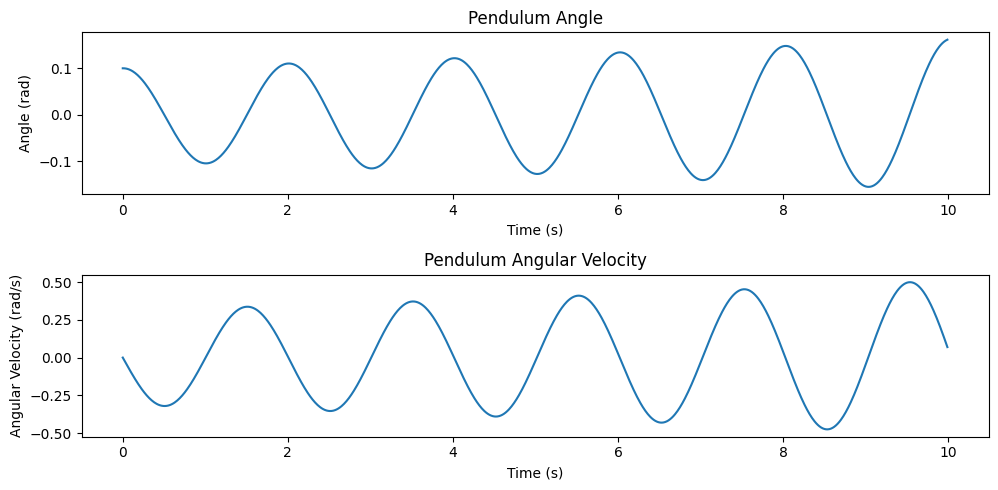

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
m = 1.0       # bob's mass (kg)
g = 9.81      # gravity (m/s^2)
L = 1.0       # rope lenght (m)
I = m * L**2  # moment of inertia (kg*m^2)

# State Space Matrices

dt = 0.01     # Time step, change in t (sec)

A = np.array([[0, 1],
              [-m * g * L / I, 0]])

B = np.array([[0],
              [1 / I]])

C = np.array([[1, 0]])

D = np.array([[0]])

# Discretized-time for A and B matrices
Ad = np.array([[1, dt],
               [-m * g * L / I * dt, 1]])
Bd = np.array([[0],
               [dt / I]])

#  Simulation Setup
time = np.arange(0, 10, dt)   # 10 seconds
x = np.zeros((2, len(time)))  # State vector: [theta, omega]
x[:, 0] = [0.1, 0]            # Initial state: [initial angle, initial angular velocity]
u = np.zeros((1, len(time)))  # input torque (set to 0 for free swing)
y = np.zeros((1, len(time)))  # output angle

#  Simulation Loop
for t in range(len(time) - 1):
    x[:, t + 1] = Ad @ x[:, t] + Bd @ u[:, t]
    y[:, t] = C @ x[:, t] + D @ u[:, t]

# visual plotting
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, x[0, :])
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Pendulum Angle')

plt.subplot(2, 1, 2)
plt.plot(time, x[1, :])
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Pendulum Angular Velocity')

plt.tight_layout()
plt.show()

## Thanks for your time :) 😍🙏